# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education.

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms.
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers,
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn.
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Importing necessary libraries and data

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#pandas display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [66]:
#Import Data
df = pd.read_csv('/content/drive/MyDrive/MIT Data Science/Classification and Hypothesis Testing/ExtraaLearn.csv')

In [67]:
#Making a copy of data
df_copy = df.copy()

## Data Overview

- Observations
- Sanity checks

In [68]:
#Identify data shape
df.shape

(4612, 15)

Data consists of 4612 rows and 15 columns

In [69]:
#Identify data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

Data does not appear to have any missing values within the dataset

In [70]:
#acquiring general statistics on data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4612.000,46.201,13.161,18.000,36.000,51.000,57.000,63.000
website_visits,4612.000,3.567,2.829,0.000,2.000,3.000,5.000,30.000
time_spent_on_website,4612.000,724.011,743.829,0.000,148.750,376.000,1336.750,2537.000
page_views_per_visit,4612.000,3.026,1.968,0.000,2.078,2.792,3.756,18.434
status,4612.000,0.299,0.458,0.000,0.000,0.000,1.000,1.000


Time spent on website appears to have some possible outliers.  Status is clearly a binary value.
We see a large age range from 18-63.
Page views appears to have a relatively tight range.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status?
3. The company uses multiple modes to interact with prospects. Which way of interaction works best?
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [8]:
#Checking for duplicates
df.duplicated().sum()

0

No duplicates within the dataset

In [9]:
#Checking for NaN values
df.isna().sum()

,0
ID,0
age,0
current_occupation,0
first_interaction,0
profile_completed,0
website_visits,0
time_spent_on_website,0
page_views_per_visit,0
last_activity,0
print_media_type1,0


dataset looks complete with no NaN values/missing values

In [10]:
#Checking for unique values
df.nunique()

,0
ID,4612
age,46
current_occupation,3
first_interaction,2
profile_completed,3
website_visits,27
time_spent_on_website,1623
page_views_per_visit,2414
last_activity,3
print_media_type1,2


ID is fully unique, and therefore is of no value to us.  That column can be dropped

In [71]:
#Dropping ID column from dataset
df.drop('ID', axis=1, inplace=True)

In [72]:
#verifying ID is no longer present
df.head()

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0


In [73]:
#define categorical columns within the dataset
cat_col = [col for col in df.columns if df[col].dtype == 'O']
for col in cat_col:
  print(f'{col}: {df[col].value_counts(1)}')
  print('-'*50)

current_occupation: current_occupation
Professional   0.567
Unemployed     0.312
Student        0.120
Name: proportion, dtype: float64
--------------------------------------------------
first_interaction: first_interaction
Website      0.551
Mobile App   0.449
Name: proportion, dtype: float64
--------------------------------------------------
profile_completed: profile_completed
High     0.491
Medium   0.486
Low      0.023
Name: proportion, dtype: float64
--------------------------------------------------
last_activity: last_activity
Email Activity     0.494
Phone Activity     0.268
Website Activity   0.239
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type1: print_media_type1
No    0.892
Yes   0.108
Name: proportion, dtype: float64
--------------------------------------------------
print_media_type2: print_media_type2
No    0.949
Yes   0.051
Name: proportion, dtype: float64
--------------------------------------------------
digital_med

Data within categorical columns does not appear to have any errors with regards to data entry.

**Exploring Data with univariate analysis**

In [14]:
#importing plotting functions
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4612 non-null   int64  
 1   current_occupation     4612 non-null   object 
 2   first_interaction      4612 non-null   object 
 3   profile_completed      4612 non-null   object 
 4   website_visits         4612 non-null   int64  
 5   time_spent_on_website  4612 non-null   int64  
 6   page_views_per_visit   4612 non-null   float64
 7   last_activity          4612 non-null   object 
 8   print_media_type1      4612 non-null   object 
 9   print_media_type2      4612 non-null   object 
 10  digital_media          4612 non-null   object 
 11  educational_channels   4612 non-null   object 
 12  referral               4612 non-null   object 
 13  status                 4612 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 504.6+ 

In [15]:
#defining our histogram_boxplot function for data visualization
def hist_box(data, col):
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={'height_ratios': (0.15, 0.85)}, figsize=(12, 6))
    # Adding a graph in each part
    sns.boxplot(data=df, x=col, ax=ax_box, showmeans=True)
    sns.histplot(data=df, x=col, kde=True, ax=ax_hist)


    plt.show()

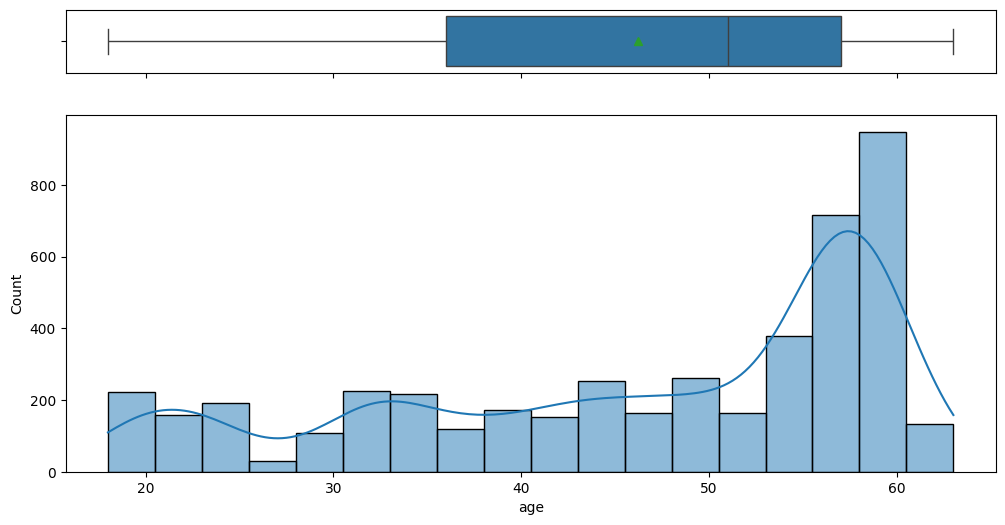

In [74]:
hist_box(df, 'age')

We have a left skewed distribution wiht regards to Age

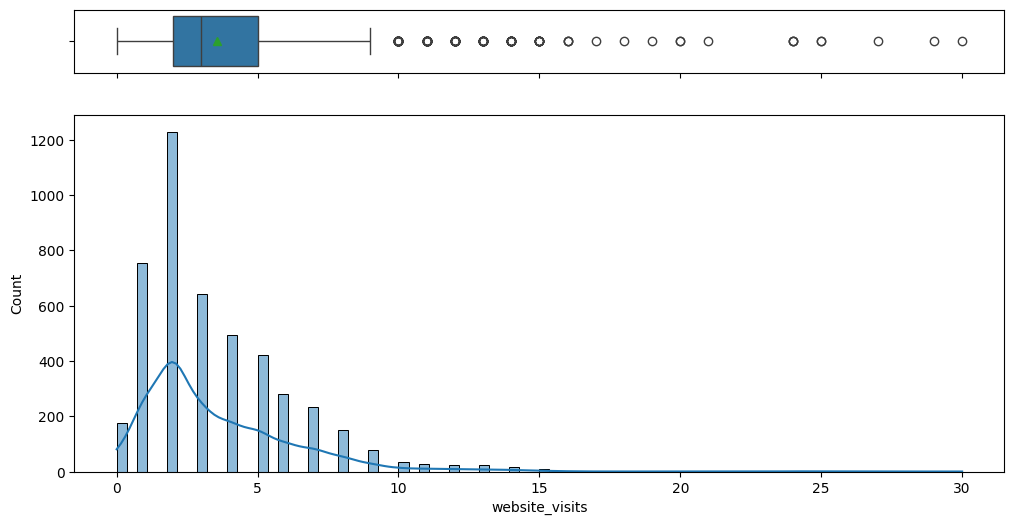

In [75]:
hist_box(df,"website_visits" )

We have a heavily right skewed data distribution with a considerable amount of outliers for Website Visits

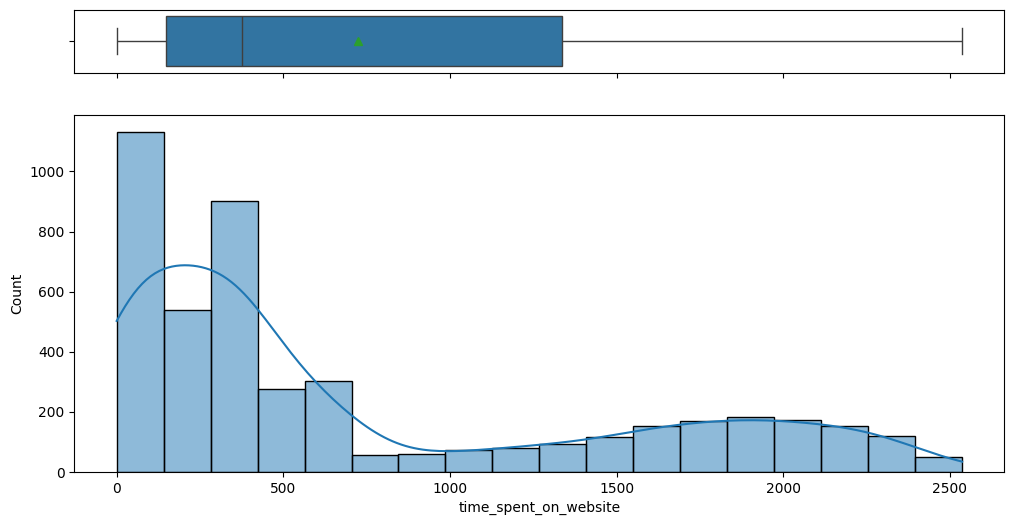

In [19]:
hist_box(df, "time_spent_on_website")

Time spent on webiste is also heavily right skewed, but no outliers appear to be present

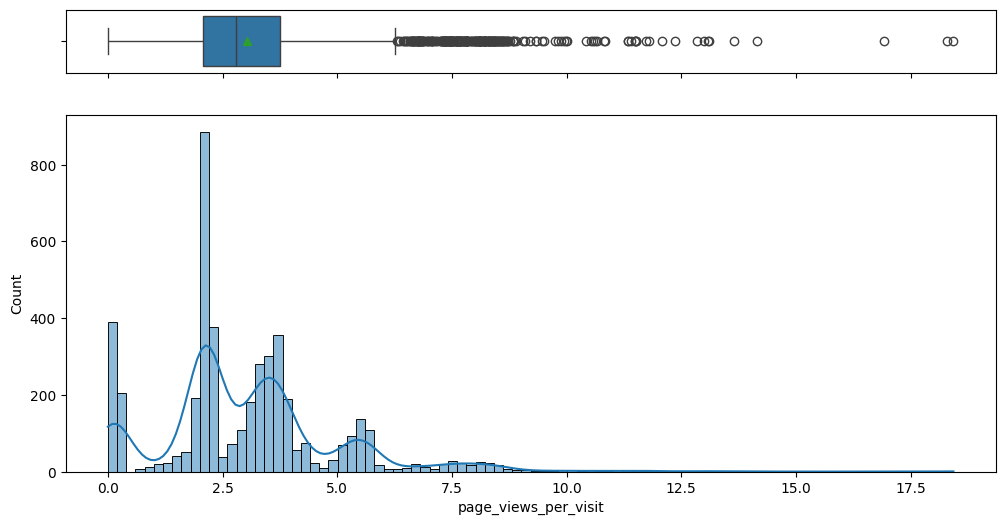

In [76]:
hist_box(df, "page_views_per_visit")

Page views shows a significant number of outliers within the data set.

**Treating the outliers in the data**
Most of our data for website visits falls between 0-9
For Page views, data falls primarily between 0-6

In [77]:
# Dropping observaions with website visits greater than 9.
df.drop(index=df[df.website_visits>9].index,inplace=True)

# Dropping observation with page views greater than 6
df.drop(index=df[df.page_views_per_visit>6].index,inplace=True)

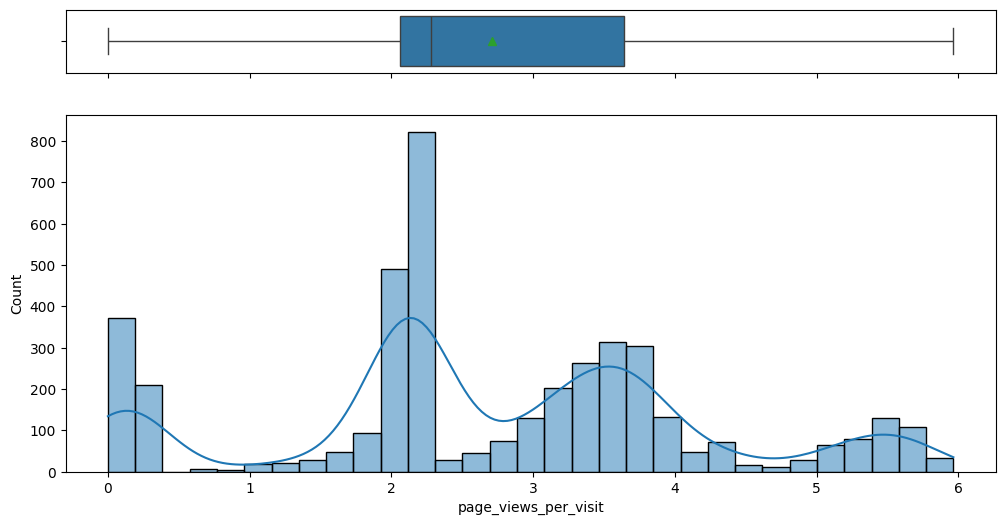

In [78]:
#Verifying outliers are removed
hist_box(df, "page_views_per_visit")

**Evaluating relationships between our data with Bivariate/Multivariate Analysis**

<Axes: >

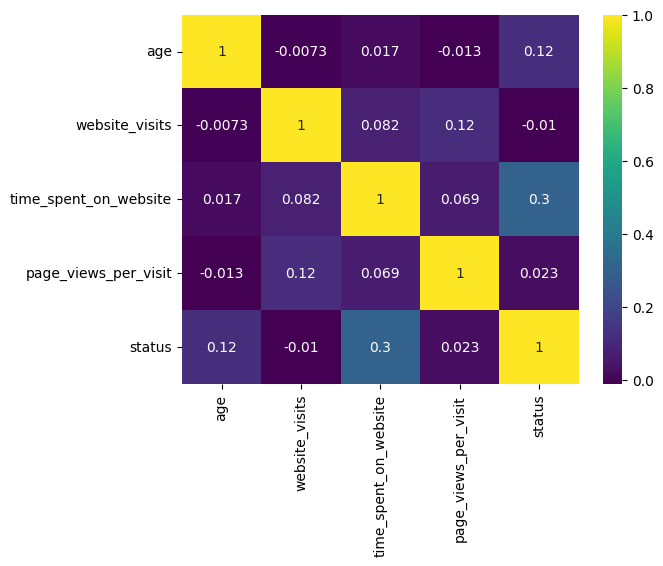

In [79]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap='viridis')

Overall, we see very week correlations among out data.  It appears website vists and page views are weakly negatively correlated with age.

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4197 entries, 0 to 4611
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    4197 non-null   int64  
 1   current_occupation     4197 non-null   object 
 2   first_interaction      4197 non-null   object 
 3   profile_completed      4197 non-null   object 
 4   website_visits         4197 non-null   int64  
 5   time_spent_on_website  4197 non-null   int64  
 6   page_views_per_visit   4197 non-null   float64
 7   last_activity          4197 non-null   object 
 8   print_media_type1      4197 non-null   object 
 9   print_media_type2      4197 non-null   object 
 10  digital_media          4197 non-null   object 
 11  educational_channels   4197 non-null   object 
 12  referral               4197 non-null   object 
 13  status                 4197 non-null   int64  
dtypes: float64(1), int64(4), object(9)
memory usage: 491.8+ KB


<Axes: xlabel='current_occupation', ylabel='website_visits'>

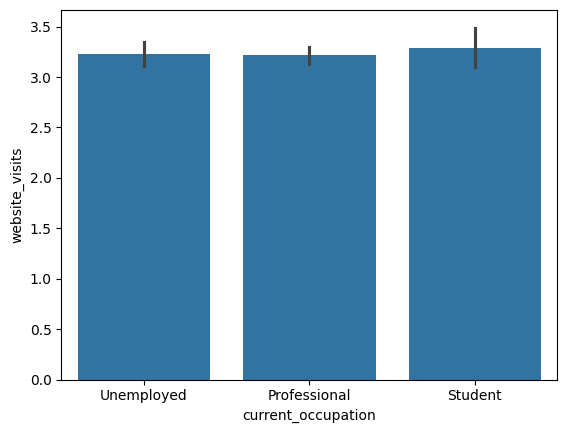

In [80]:
sns.barplot(df, x='current_occupation', y='website_visits')

<Axes: xlabel='profile_completed', ylabel='page_views_per_visit'>

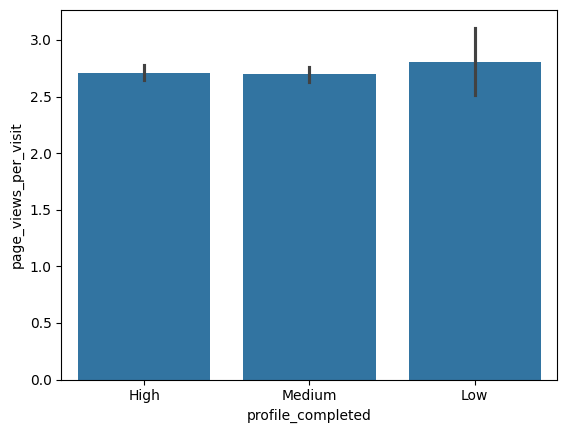

In [34]:
sns.barplot(df, x='profile_completed', y='page_views_per_visit')

<Axes: xlabel='referral', ylabel='page_views_per_visit'>

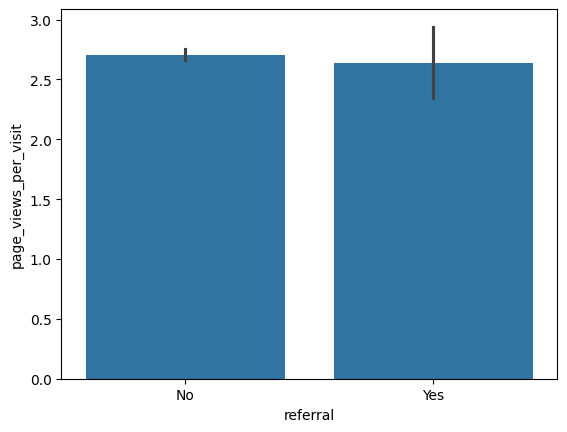

In [38]:
sns.barplot(df, x='referral', y='page_views_per_visit')

Evaluation of Categorical Variables

In [81]:
def stacked_barplot(data, predictor, target):
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(by=sorter, ascending=False)
    print(tab1)
    tab = pd.crosstab(data[predictor], data[target], normalize='index').sort_values(by=sorter, ascending=False)
    tab.plot(kind='bar', stacked=True, figsize=(count+1, 5))
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), frameon=True)
    plt.show()

status                 0     1   All
current_occupation                  
All                 2932  1265  4197
Professional        1533   853  2386
Unemployed           971   353  1324
Student              428    59   487


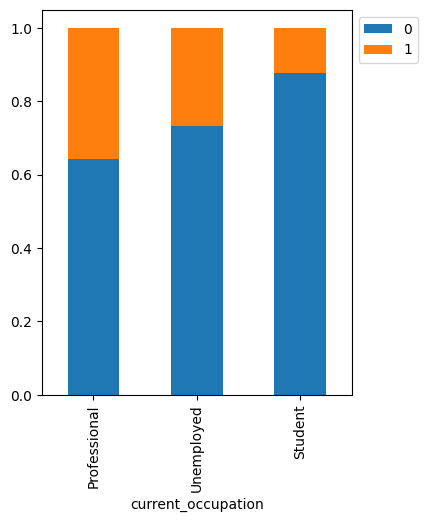

In [82]:
stacked_barplot(df, 'current_occupation', 'status')

educational_channels    No  Yes   All
digital_media                        
All                   3564  633  4197
No                    3163  560  3723
Yes                    401   73   474


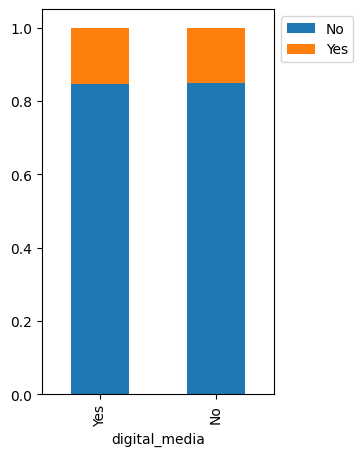

In [39]:
stacked_barplot(df, 'digital_media', 'educational_channels')

age                 18  19  20  21  22  23  24  25  26  27  28  29  30  31  \
current_occupation                                                           
Professional         0   0   0   0   0   0   0  15  14  12  24  33  40  33   
All                 61  72  65  77  63  73  75  16  14  12  24  33  40  33   
Student             61  72  65  77  63  73  75   1   0   0   0   0   0   0   
Unemployed           0   0   0   0   0   0   0   0   0   0   0   0   0   0   

age                  32  33  34  35  36  37  38  39  40  41  42  43  44  45  \
current_occupation                                                            
Professional         44  40  50  43  28  34  40  31  36  47  48  50  40  42   
All                 167  68  71  63  52  53  55  49  58  64  75  82  70  73   
Student               0   0   0   0   0   0   0   0   0   0   0   0   0   0   
Unemployed          123  28  21  20  24  19  15  18  22  17  27  32  30  31   

age                 46  47  48  49  50  51  52  53  54  

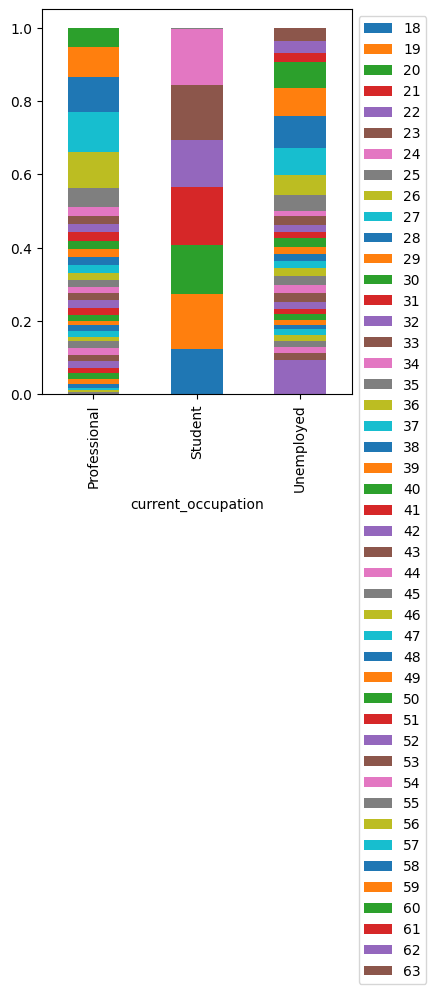

In [83]:
stacked_barplot(df, 'current_occupation', 'age')

In [84]:
df.groupby(["current_occupation"])["age"].describe()

,count,mean,std,min,25%,50%,75%,max
current_occupation,,,,,,,,
Professional,2386.000,49.396,9.859,25.000,42.000,54.000,57.000,60.000
Student,487.000,21.094,2.000,18.000,19.000,21.000,23.000,25.000
Unemployed,1324.000,50.154,9.996,32.000,42.000,54.000,58.000,63.000


The breakdown of age as a function of occupation makes sense with most of the younger customers being students, ad the bulk of the customers falling within the Professional Category

status                0     1   All
first_interaction                  
All                2932  1265  4197
Website            1254  1069  2323
Mobile App         1678   196  1874


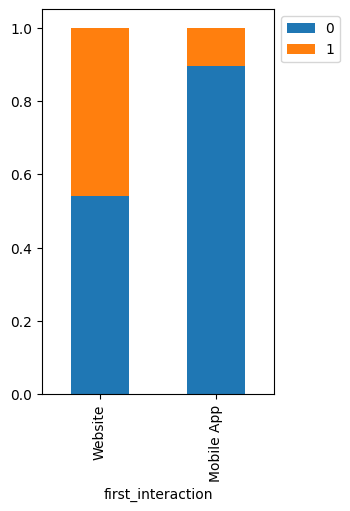

In [85]:
stacked_barplot(df, 'first_interaction', 'status')

Website interactions tend to lead to more customers relative to mobile app interactions

status               0     1   All
last_activity                     
All               2932  1265  4197
Email Activity    1448   637  2085
Website Activity   618   387  1005
Phone Activity     866   241  1107


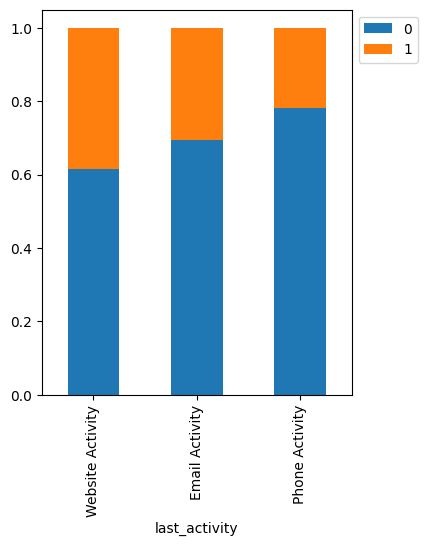

In [87]:
stacked_barplot(df, 'last_activity', 'status')

Once again, website activity is leading to more customers

# **Building our Decision Tree**

Model cases:

-lead predicted not to convert, but would convert = loss of customer (A)

-lead predicted to convert, but would not convert = loss of resources (B)

(A) is the worst case (False Negative), and therefore our models need to prioritize maximizing Recall

In [40]:
#Getting a list of all categorical variables
df.select_dtypes(include=['object', 'category']).columns.tolist()

['current_occupation',
 'first_interaction',
 'profile_completed',
 'last_activity',
 'print_media_type1',
 'print_media_type2',
 'digital_media',
 'educational_channels',
 'referral']

In [41]:
#Adding dummy variables for our categorical variables
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object', 'category']).columns.tolist(), drop_first=True)

In [43]:
#Splitting data into independent variables (x) and dependent variable (y)
x= df.drop(columns='status', axis=1)
y= df['status']

In [120]:
#import models (Classifier is used since dependent variable is categorical)
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report,roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer)

In [46]:
#splitting our data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=1)

In [48]:
#verifying our data split
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3357, 16), (840, 16), (3357,), (840,))

In [89]:
#Creating our functions to calculate model metrics
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))

    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))

    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ['Not Converted', 'Converted'], yticklabels = ['Not Converted', 'Converted'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [93]:
#Building our Decision Tree
dt_class=DecisionTreeClassifier(random_state=1)
dt_class.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2350
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      3357
   macro avg       1.00      1.00      1.00      3357
weighted avg       1.00      1.00      1.00      3357



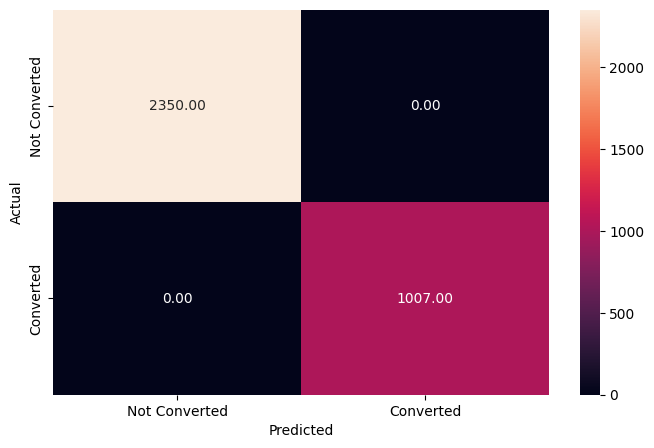

In [94]:
#Checking our tree against our training data
dt_class_train = dt_class.predict(x_train)
metrics_score(y_train, dt_class_train)

Our model has no errors within the training data

              precision    recall  f1-score   support

           0       0.87      0.87      0.87       582
           1       0.70      0.69      0.70       258

    accuracy                           0.82       840
   macro avg       0.78      0.78      0.78       840
weighted avg       0.82      0.82      0.82       840



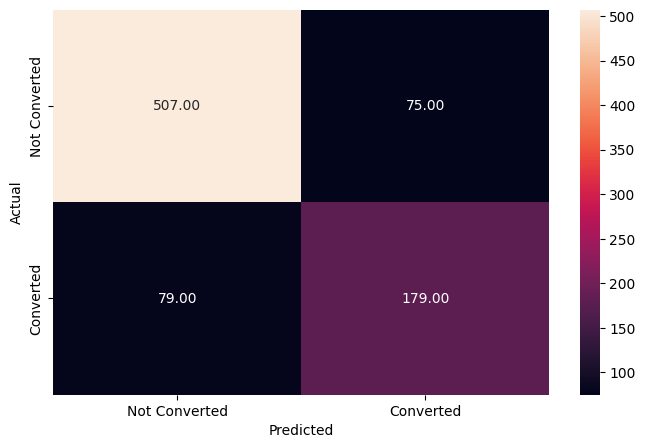

In [95]:
#Checking our Tree against our test data
dt_class_test = dt_class.predict(x_test)
metrics_score(y_test, dt_class_test)

Predictions on the test set show a slight favor towards Precision, but the model is relatively accurate at 82%

In [97]:
#Tune the tree using GridSearchCV
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}


# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, cv=5,scoring='recall', n_jobs= -1 )
grid_obj = grid_obj.fit(x_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, min_samples_split=10,
                       random_state=1)

Optimal hyperparameters have been established.  Lets evaluate the performance of the Tuned Tree

              precision    recall  f1-score   support

           0       0.93      0.84      0.88      2350
           1       0.69      0.85      0.76      1007

    accuracy                           0.84      3357
   macro avg       0.81      0.85      0.82      3357
weighted avg       0.86      0.84      0.85      3357



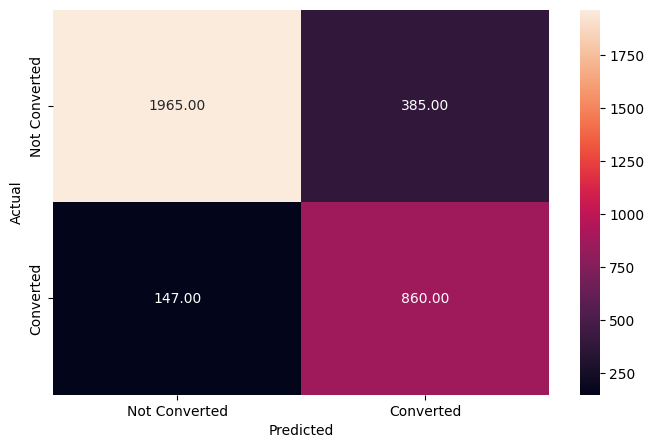

In [98]:
#checking the tuned tree on the training set
dt_tuned_train = estimator.predict(x_train)
metrics_score(y_train, dt_tuned_train)

The tuned tree has a much higher recall score, which is ideal for our situation


              precision    recall  f1-score   support

           0       0.92      0.85      0.88       582
           1       0.71      0.84      0.77       258

    accuracy                           0.84       840
   macro avg       0.81      0.84      0.83       840
weighted avg       0.86      0.84      0.85       840



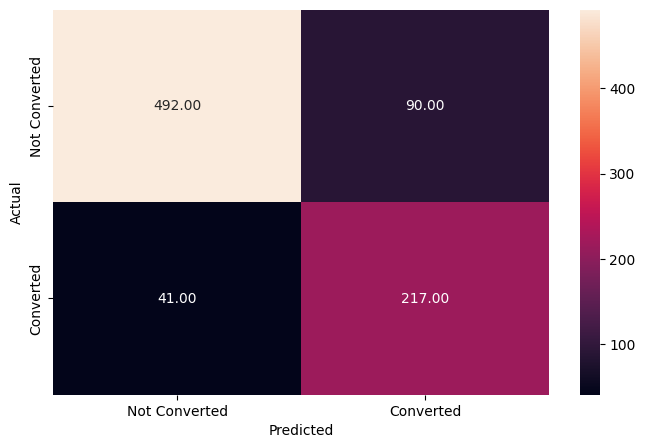

In [99]:
#testing the tuned tree performance on the test data
dt_tuned_test = estimator.predict(x_test)
metrics_score(y_test, dt_tuned_test)

The Tuned tree offers better performance relative to the untuned tree

In [100]:
#importing features to view our tree
from sklearn import tree

In [101]:
#identifying our features of our tree
features=list(x.columns)
features

['age',
 'website_visits',
 'time_spent_on_website',
 'page_views_per_visit',
 'current_occupation_Student',
 'current_occupation_Unemployed',
 'first_interaction_Website',
 'profile_completed_Low',
 'profile_completed_Medium',
 'last_activity_Phone Activity',
 'last_activity_Website Activity',
 'print_media_type1_Yes',
 'print_media_type2_Yes',
 'digital_media_Yes',
 'educational_channels_Yes',
 'referral_Yes']

In [55]:
#setting hyperparameters to build a viewable tree
dt_clas_viz = DecisionTreeClassifier(max_depth=3, random_state=1)
dt_clas_viz.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=1)

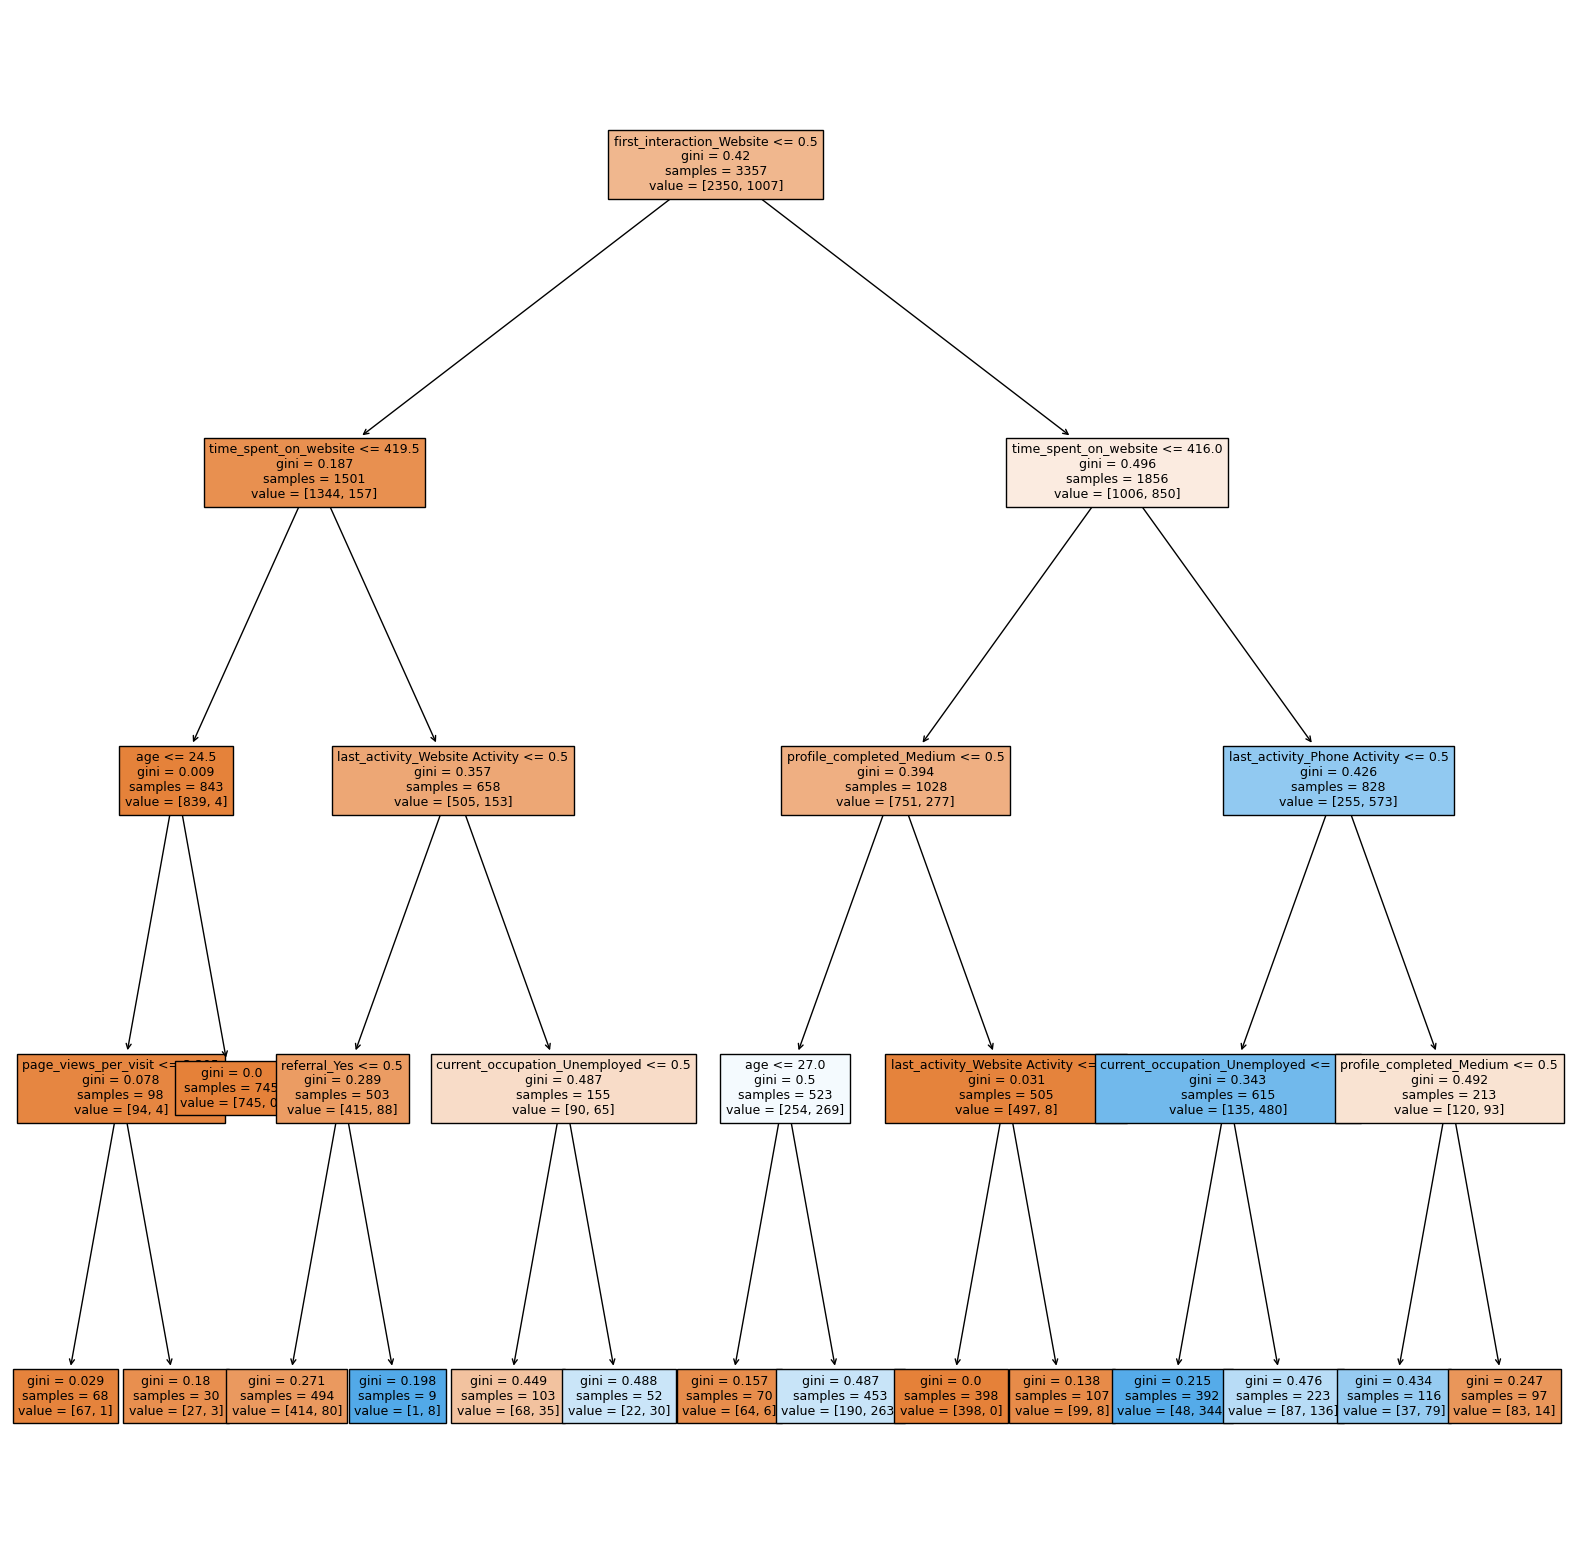

In [107]:
features=list(x.columns)
plt.figure(figsize=(20, 20))
out = tree.plot_tree(
    estimator,
    max_depth=4,
    feature_names=features,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
plt.show()

The first interaction appears to be our main feature in which our tree is created at the root node. Our tree can be interpreted as follows:  Blues leaves represent conversions, Orange Leaves represent non conversions.  Darker colors represent a greater number of each category.

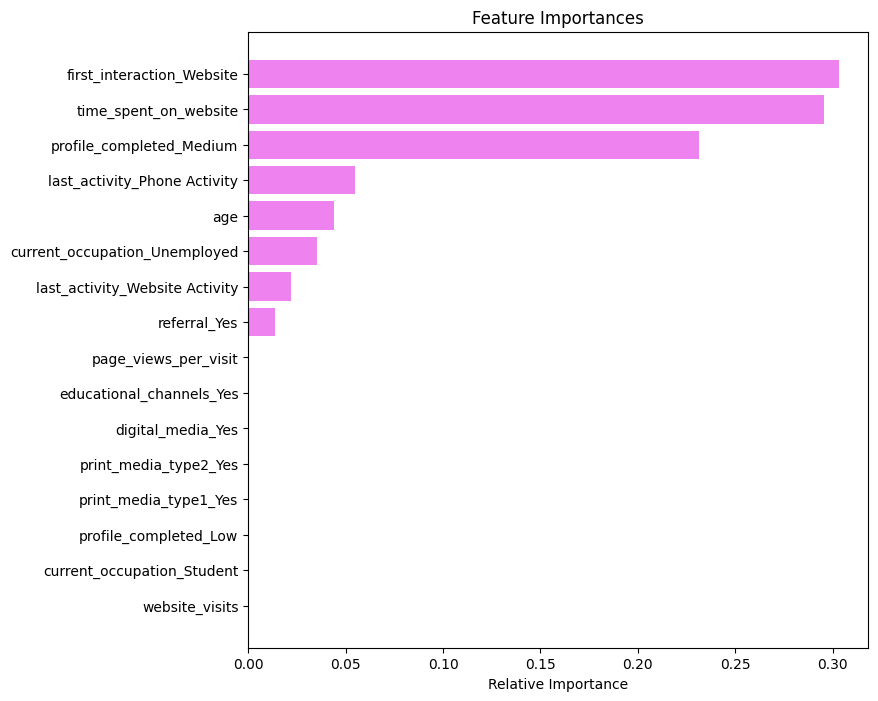

In [109]:
# Importance of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

First Interaction on Website and Time spent on Website are the most important features.  Completed profile is not far behind in terms of importance.

## Building a Random Forest model

In [59]:
#Building our Random Forest
rf_class=RandomForestClassifier(random_state=1)
rf_class.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2350
           1       1.00      1.00      1.00      1007

    accuracy                           1.00      3357
   macro avg       1.00      1.00      1.00      3357
weighted avg       1.00      1.00      1.00      3357



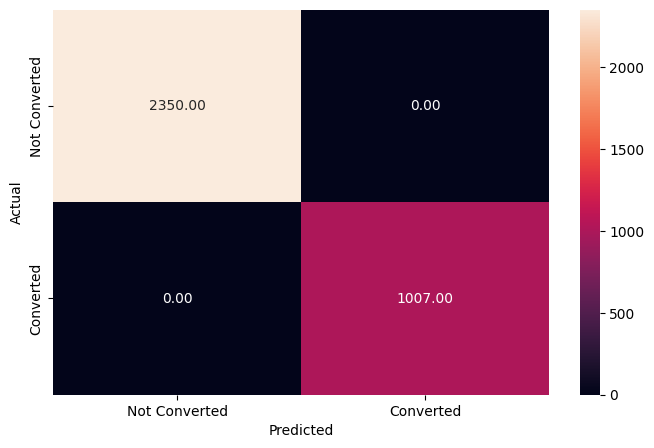

In [112]:
#Test RF performance on Training Data
rf_class_train = rf_class.predict(x_train)
metrics_score(y_train, rf_class_train)

As expected, the Random forest has no errors in fitting the training data.

              precision    recall  f1-score   support

           0       0.89      0.91      0.90       582
           1       0.79      0.74      0.77       258

    accuracy                           0.86       840
   macro avg       0.84      0.83      0.83       840
weighted avg       0.86      0.86      0.86       840



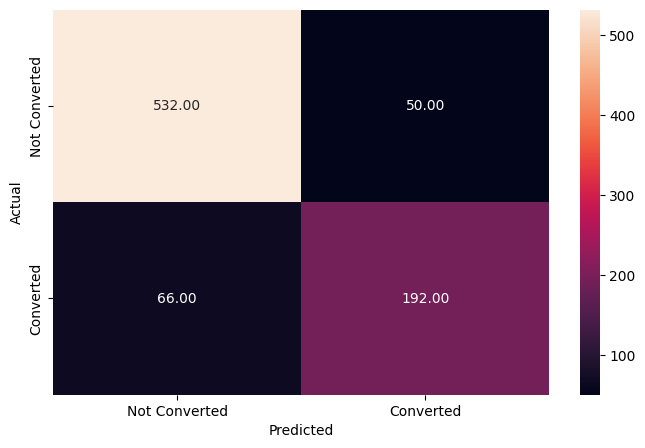

In [113]:
#Test RF performance on Test Data
rf_class_test= rf_class.predict(x_test)
metrics_score(y_test, rf_class_test)

The RF may be slightly overfitting, but lets try to tune parameters

<Axes: xlabel='Importance', ylabel='None'>

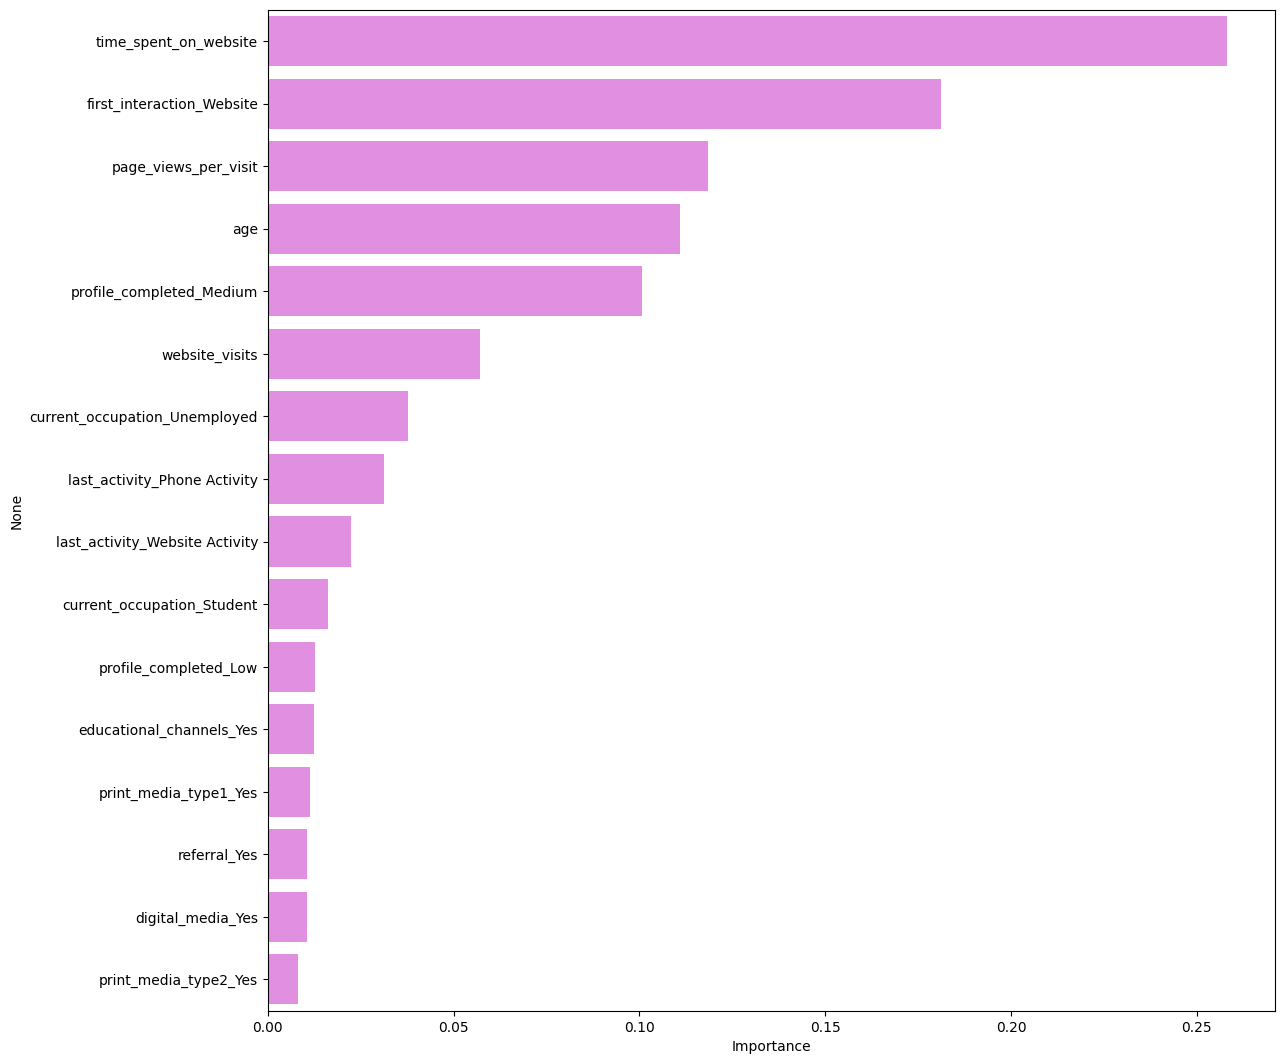

In [115]:
#Finding our most important features within our RF
importances = rf_class.feature_importances_

# Ensure that 'X' has the correct number of features (22) before extracting columns
columns = rf_class.feature_names_in_

# Reshape importances to a 2D array with a single column
importance_df = pd.DataFrame(importances.reshape(-1, 1), index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

We see a similar trend with the RF key features compared to the Decision Tree.  Both models indicate time on website and firt interaction on website are the key features.  The RF does indicate that page views and age also play an impact into determining if a lead will convert.

In [122]:
import sklearn.metrics as metrics

In [125]:
#Tuning our RF using Gridsearch
rf_class_tuned = RandomForestClassifier(criterion = "entropy", random_state = 1)
parameters = {"n_estimators": [110, 120],
    "max_depth": [6, 7],
    "min_samples_leaf": [20, 25],
    "max_features": [0.8, 0.9],
    "max_samples": [0.9, 1],
    "class_weight": ["balanced",{0: 0.3, 1: 0.7}]
}
scorer = metrics.make_scorer(metrics.recall_score)
grid_obj = GridSearchCV(rf_class_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_fit = grid_obj
grid_fit.fit(x_train, y_train)
rf_class_tuned = grid_fit.best_estimator_
rf_class_tuned.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, max_features=0.9, max_samples=0.9,
                       min_samples_leaf=25, n_estimators=120, random_state=1)

We have optimized our hyperparameters for our RF.  Now lets check how the model performs on the training data.

              precision    recall  f1-score   support

           0       0.94      0.82      0.88      2350
           1       0.68      0.87      0.76      1007

    accuracy                           0.84      3357
   macro avg       0.81      0.85      0.82      3357
weighted avg       0.86      0.84      0.84      3357



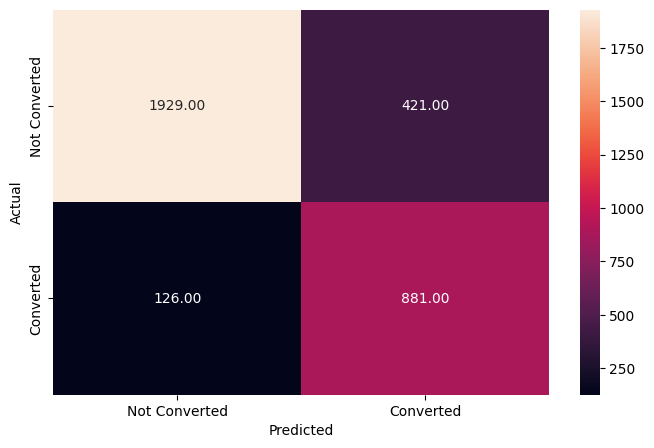

In [129]:
#Testing tuned RF on Training Data
rf_class_tuned_train = rf_class_tuned.predict(x_train)
metrics_score(y_train, rf_class_tuned_train)

The model has high recall, and still has a good balance between Precision and Recall.  let check model performance on the Test Data

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       582
           1       0.69      0.86      0.77       258

    accuracy                           0.84       840
   macro avg       0.81      0.85      0.82       840
weighted avg       0.86      0.84      0.84       840



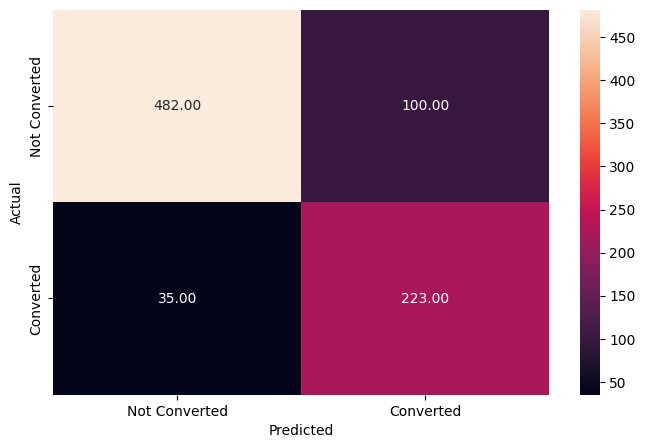

In [130]:
#Testing Tuned RF on Test Data
rf_class_tuned_test= rf_class_tuned.predict(x_test)
metrics_score(y_test, rf_class_tuned_test)

The tuned RF seems to provide a good prediction model for our data set.  Lets see if any key features have changed.

<Axes: xlabel='Importance', ylabel='None'>

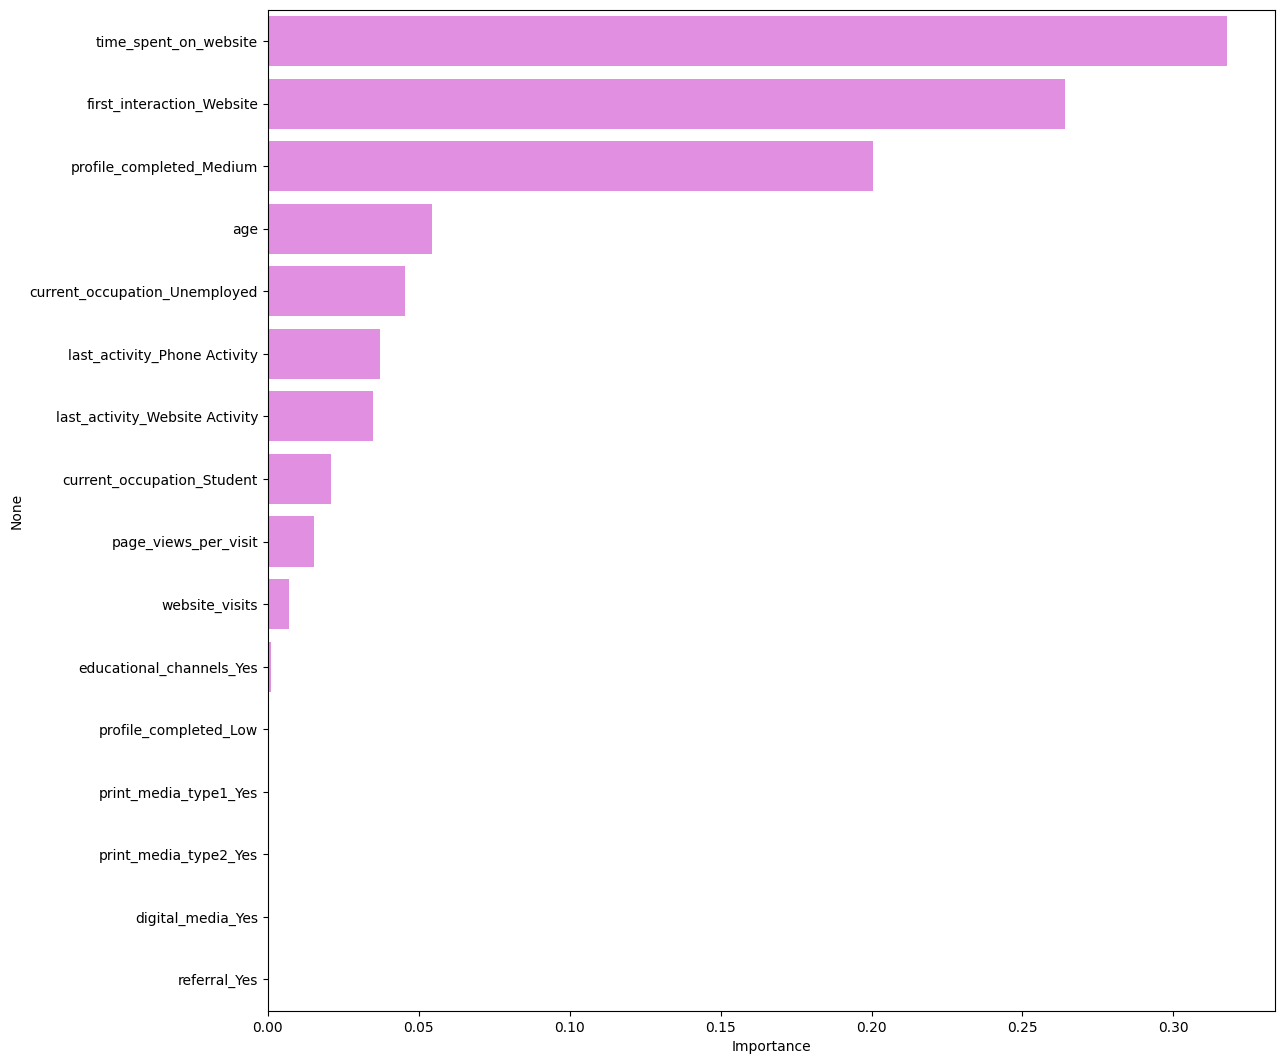

In [128]:
#Finding our most important features within our RF
importances = rf_class_tuned.feature_importances_

# Ensure that 'X' has the correct number of features (22) before extracting columns
columns = rf_class_tuned.feature_names_in_

# Reshape importances to a 2D array with a single column
importance_df = pd.DataFrame(importances.reshape(-1, 1), index=columns, columns=["Importance"]).sort_values(by="Importance", ascending=False)

plt.figure(figsize = (13, 13))

sns.barplot(x = importance_df.Importance, y = importance_df.index, color="violet")

Relative to our untuned RF, the tuned RF maintains the same top 2 key features, and further priorities profile completion while dropping page views down in terms of importance.

## Do we need to prune the tree?

Our tree does not seem to require pruning now that our hyperparameters have been tuned.

## Actionable Insights and Recommendations

Based on the data, we see the following:



*   Nearly 75% of our model predictions are based on Time spent on Website, First Interaction on Website, and a medium completed profile
*   Customer Age, Occupation, page views, and last activity do play a role in determining if a customer will convert, albeit a small one

The Company needs to:
  

1.   prioritize driving customers to the website, and ensuring they stay on the website for as long as possible (reducing bounce rate)
2.   Ensuring first interactions are occuring on the website, rather than other forms of interaction
3. Driving potential customers to create profiles, at least to a medium level


As for customer demographics, it appears customers who are unemployed are most likely to convert.  Additionally, while age plays a minimal role, it appears that customers over the age of 27 are also more likely to convert compared to younger customers, therefore the company, unless they are looking to appeal to a new market, should focus marketing towards towards post-student aged customers in an effort to maximize sale conversions.




